In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

import h5py

from adaptnn.model_fitting import ArtificialModel
import tltorch
torch.set_default_device('cuda:0')

In [2]:
model = ArtificialModel(dataset_params = {"filter_spatial" : (15,15),
                                         "filter_time" : 10,
                                         "num_cells" : 4,
                                         "out_noise_std_train" : 0.1,
                                         "out_noise_std_test" : None,
                                         "filter_rank" : 2,
                                         "disjoint_segments" : True},
                        net_params = {"layer_time_lengths" : (10,5),
                                     "layer_rf_pixel_widths" : (5,5),
                                     "layer_channels" : (4,4,),
                                     "layer_spatio_temporal_rank" : 4,
                                     "layer_spatio_temporal_factorization_type" : ('spatial',),
                                     "out_normalization" : True,
                                     "layer_normalization" : True})
print(model.dataset.start_idx_X_train)
print(model.dataset.X_train.shape)

Building multi-layer convolutional model for 4 neurons and image size 15 x 15
Adding 3D batch normalization layer.
Adding Tucker convolutional layer of size (5, 5, 10) and 4 channels with factorization type spatial and rank 4.
Adding nonlinearity: Softplus.
Adding 3D batch normalization layer.
Adding Tucker convolutional layer of size (5, 5, 5) and 4 channels with factorization type spatial and rank 4.
Adding nonlinearity: Softplus.
Adding final 3D batch normalization layer.
Adding full-connected linear layer: [4, 7, 7] to 4.
Adding output nonlinearity: Softplus.
Model initialized.
tensor([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
        1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
        2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500,
        3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700,
        4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
        600

/home/latimerk/miniconda3/envs/ANN/lib/python3.12/site-packages/torch/utils/_device.py:77: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)
/home/latimerk/gitRepos/adaptnn/src/adaptnn/retina_datasets.py:77: UserWarning: Segmentation of dataset leaves 90 time bins unseen.
  warnings.warn(f"Segmentation of dataset leaves {unused_bins} time bins unseen.")
/home/latimerk/gitRepos/adaptnn/src/adaptnn/retina_datasets.py:77: UserWarning: Segmentation of dataset leaves 86 time bins unseen.
  warnings.warn(f"Segmentation of dataset leaves {unused_bins} time bins unseen.")


In [3]:
model.train(epochs=2000,print_every=10,penalty_params = {"en_lambda" : 0.0001}, optimizer_params = {"lr" : 1e-3})#, scheduler_params=None)

epoch 10, loss 1.9842751920223236, step size 0.0009685000000000017
epoch 20, loss 1.8399222642183304, step size 0.0009370000000000014
epoch 30, loss 1.6077871322631836, step size 0.0009055000000000019
epoch 40, loss 1.398977369070053, step size 0.0008740000000000018
epoch 50, loss 1.2841381579637527, step size 0.0008425000000000023
epoch 60, loss 1.1649240553379059, step size 0.0008110000000000021
epoch 70, loss 1.0855152159929276, step size 0.0007795000000000024
epoch 80, loss 1.027937039732933, step size 0.0007480000000000015
epoch 90, loss 0.9893081784248352, step size 0.0007165000000000004
epoch 100, loss 0.953902930021286, step size 0.0006850000000000006
epoch 110, loss 0.9202931523323059, step size 0.0006535
epoch 120, loss 0.8839280754327774, step size 0.0006219999999999993
epoch 130, loss 0.8593880236148834, step size 0.0005904999999999986
epoch 140, loss 0.8407121822237968, step size 0.0005589999999999979
epoch 150, loss 0.8286981582641602, step size 0.0005274999999999968
epoc

In [10]:
Y_fit, Y_true = model.predict()
Y_fit = Y_fit.cpu().numpy().squeeze()
Y_true = Y_true.cpu().numpy().squeeze()

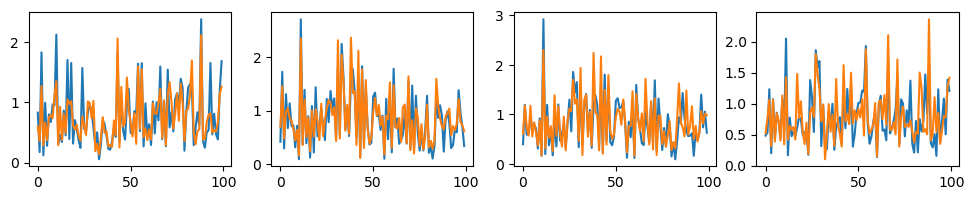

In [11]:
NC = 4
NR = int(np.ceil(model.dataset.num_cells)/NC)

T = 100
plt.figure(figsize=(NC*3,NR*2))
for ii in range(model.dataset.num_cells):
    plt.subplot(NR,NC,ii+1)
    plt.plot(Y_true[ii,:T])
    plt.plot(Y_fit[ ii,:T])

In [14]:
with torch.no_grad():
    Y2 = model.model(model.dataset.X_train.unsqueeze(0).unsqueeze(0)).cpu().numpy().squeeze()
    Y1 = model.dataset.Y_train_0.cpu().numpy()[:,9:]

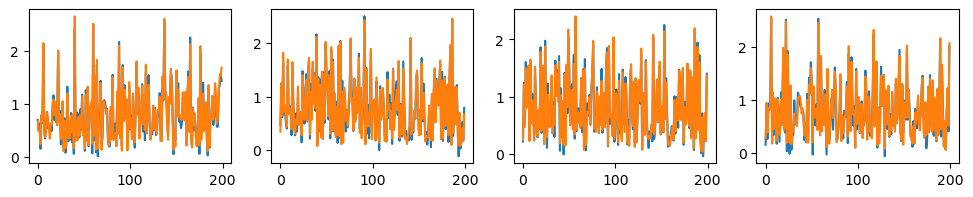

In [15]:
NC = 4
NR = int(np.ceil(model.dataset.num_cells)/NC)

T = 200
plt.figure(figsize=(NC*3,NR*2))
for ii in range(model.dataset.num_cells):
    plt.subplot(NR,NC,ii+1)
    plt.plot(Y1[ii,:T])
    plt.plot(Y2[ ii,:T])
    # plt.scatter(Y1[ii,:],Y1[ii,:])